In [1]:
def cv2_imshow(image):
# developed by Kanishke Gamagedara, udpated by MAE6292
    plt.figure(dpi=200)
    mode = len(np.shape(image))
    if mode==3:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    elif mode==2:
        plt.imshow(image, cmap='gray')
    else:
        print('Unsuported image size')
        raise
    plt.xticks([]), plt.yticks([]) 
    plt.axis('off')



In [67]:
import numpy as np
import skimage as sk
import skimage.io as skio
from skimage.transform import rescale
import cv2
import matplotlib.pyplot as plt

name1 = "wrighton"
name2 = "bear"

imname1 = "hybridimages/" + name1 + ".jpg"
imname2 = "hybridimages/" + name2 + ".jpg"

im1 = cv2.imread(imname1,cv2.IMREAD_GRAYSCALE)
im2 = cv2.imread(imname2,cv2.IMREAD_GRAYSCALE)



In [68]:
# align the images
# functions that might be useful for aligning the images include:
# np.roll, np.sum, sk.transform.rescale (for multiscale) # Downscaling
def align_force(img, base_img):
    # Not needed - but focuses the differences based on the middle of the image
    thirdx = int(base_img.shape[0]/3)
    thirdy = int(base_img.shape[1]/3)
#     [thirdx:thirdx*2, thirdy:thirdy*2]
    # Gather base scores for unshifted image
    best_score = np.sum((base_img[thirdx:thirdx*2, thirdy:thirdy*2] - img[thirdx:thirdx*2, thirdy:thirdy*2])**2)
#     print('original', best_score)
    adj_image = 0
    
    # Shifting the image
    for i in range(-15, 15):
        for j in range(-15, 15):
            rollx = np.roll(img, i, axis=0)
            test_img = np.roll(rollx, j, axis=1)
            
            test_score = np.sum((base_img[thirdx:thirdx*2, thirdy:thirdy*2] - test_img[thirdx:thirdx*2, thirdy:thirdy*2])**2)
            
            if (test_score < best_score):
                adj_image = test_img
                best_score = test_score
                offsetx = i
                offsety = j

#     print(best_score, offsetx, offsety)
    return adj_image


(938, 1026)


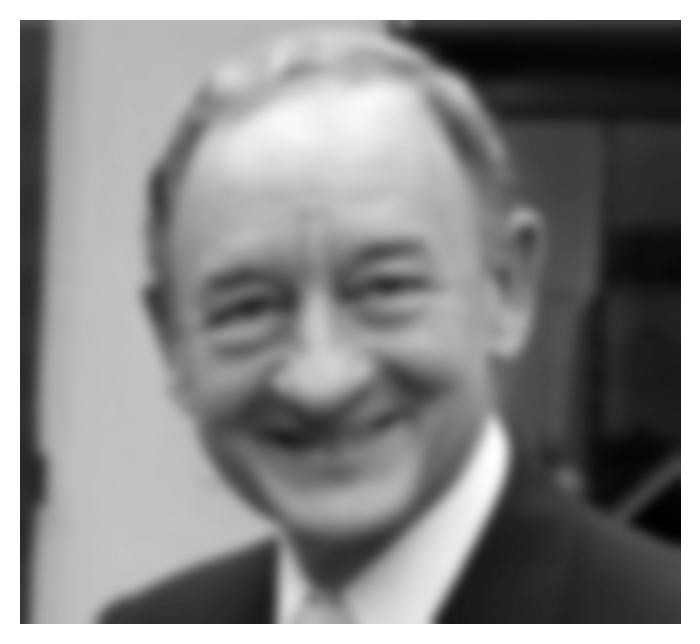

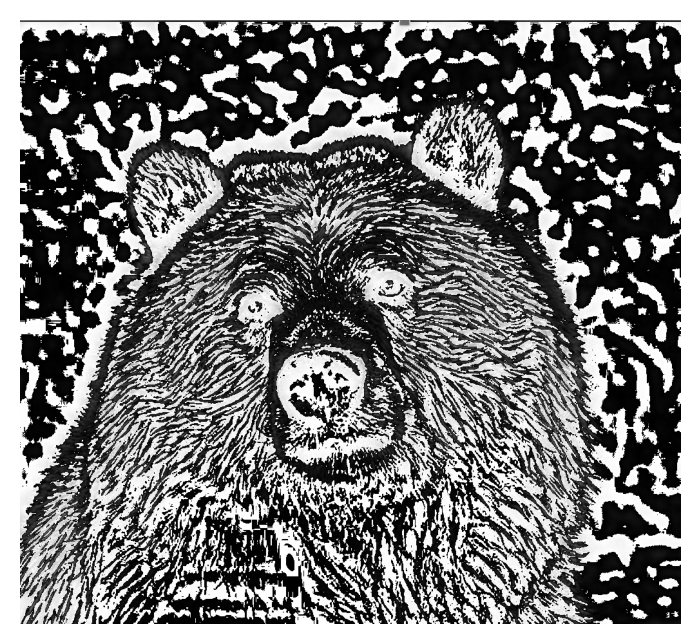

In [71]:
print(im1.shape)

im1blur = cv2.GaussianBlur(im1,(225, 255), 10)
im2blur = cv2.GaussianBlur(im2,(225, 255), 10)

im2_blur = im2 - im2blur
im1_blur = im1 - im1blur


#image = cv2.imread('example/image.png')
cv2_imshow(im1blur)
cv2_imshow(im2_blur)

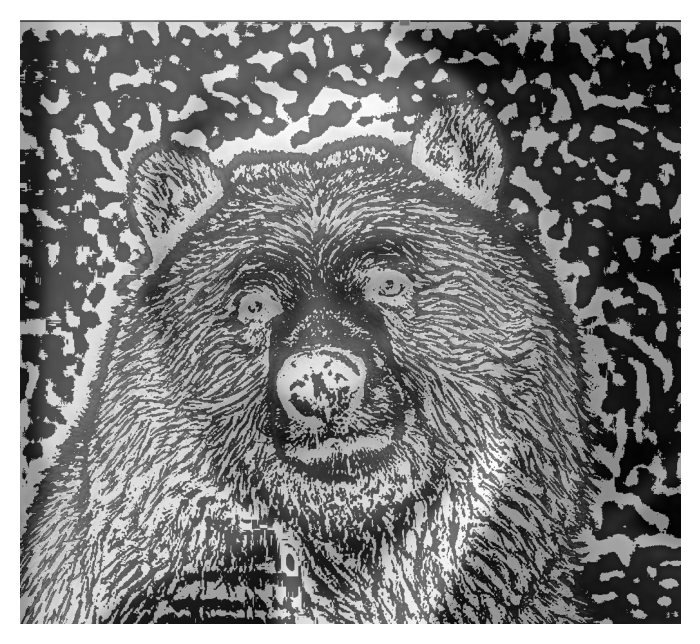

In [72]:
im3 = cv2.addWeighted(im2_blur,0.5,im1blur,0.5,0)
cv2_imshow(im3)

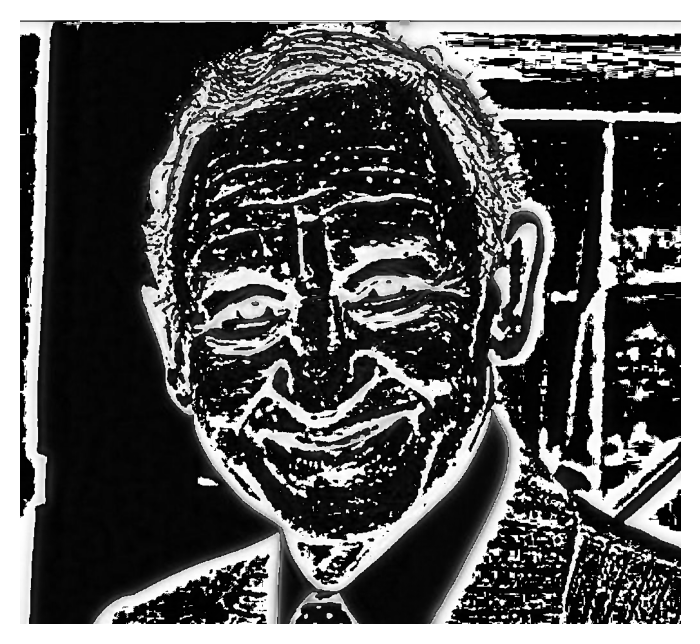

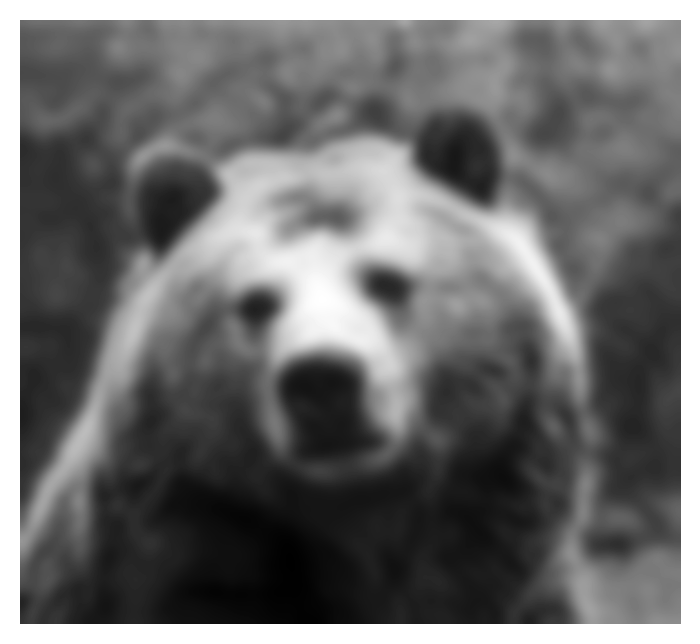

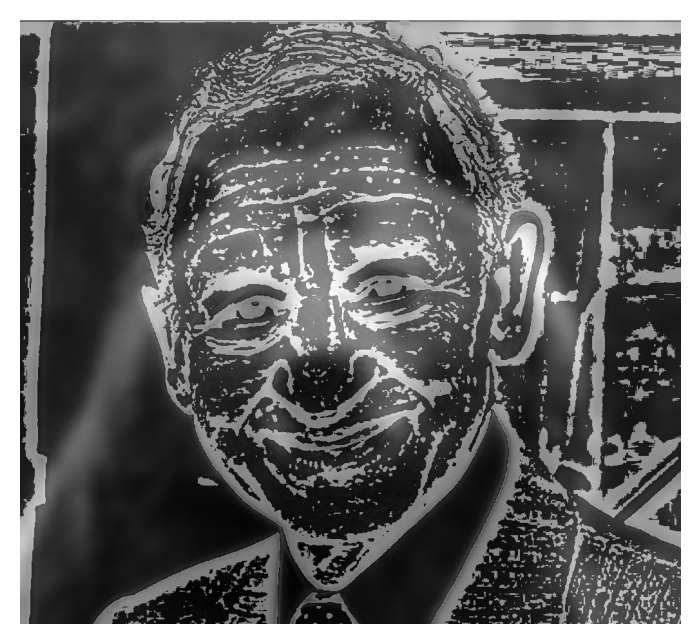

In [76]:
cv2_imshow(im1_blur)
cv2_imshow(im2blur)

im3 = cv2.addWeighted(im2blur,0.5,im1_blur,0.4,0)
cv2_imshow(im3)

In [ ]:
im1_blur = cv2.GaussianBlur(im1,(21, 21), 10)
im2blur = cv2.GaussianBlur(im2,(21, 21), 10)

